In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
data=pd.read_csv(r"cardekhoDATA.csv")
data.shape

(8244, 18)

In [5]:
data.head(10)

,fuel_type,body_type,kilometer,transmission_type,owner_no,brand,model,model_year,price,registration_year,seats_count,RDO_no,car_engine_cc,mileage,color,gear_box,location,age
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,KA51,998,23.10,White,5,bangalore,8
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,KA05,1497,17.00,White,5,bangalore,5
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,KA03,1199,23.84,Red,5,bangalore,5
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,KA53,1197,19.10,Others,5,bangalore,9
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,KA04,1248,23.65,Gray,5,bangalore,8
5,Diesel,SUV,20000,Manual,1,Jeep,Jeep Compass,2020,1900000.0,2020,5,KA04,1956,17.10,Others,6,bangalore,3
6,Petrol,Hatchback,37772,Manual,1,Datsun,Datsun GO,2017,345000.0,2017,5,KA05,1198,20.63,Grey,5,bangalore,6
7,Petrol,SUV,30000,Automatic,1,Hyundai,Hyundai Venue,2021,1200000.0,2021,5,KA51,998,18.15,Others,7,bangalore,2
8,Petrol,Sedan,37000,Automatic,1,Maruti,Maruti Ciaz,2018,960000.0,2018,5,KA03,1462,20.28,Maroon,4,bangalore,5
9,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2017,585000.0,2018,5,KA03,1199,23.84,Red,5,bangalore,5


# removing unwanted columns

In [6]:
data.drop(columns=['RDO_no','gear_box'],inplace=True)

# removing duplicate rows

In [7]:
d=data[data.duplicated()]

In [8]:
data.drop(d.index,inplace=True)

In [9]:
data.shape

(8131, 16)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8131 entries, 0 to 8243
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel_type          8131 non-null   object 
 1   body_type          8127 non-null   object 
 2   kilometer          8131 non-null   int64  
 3   transmission_type  8131 non-null   object 
 4   owner_no           8131 non-null   int64  
 5   brand              8131 non-null   object 
 6   model              8131 non-null   object 
 7   model_year         8131 non-null   int64  
 8   price              8131 non-null   float64
 9   registration_year  8131 non-null   int64  
 10  seats_count        8131 non-null   int64  
 11  car_engine_cc      8131 non-null   int64  
 12  mileage            8131 non-null   float64
 13  color              8131 non-null   object 
 14  location           8131 non-null   object 
 15  age                8131 non-null   int64  
dtypes: float64(2), int64(7), obje

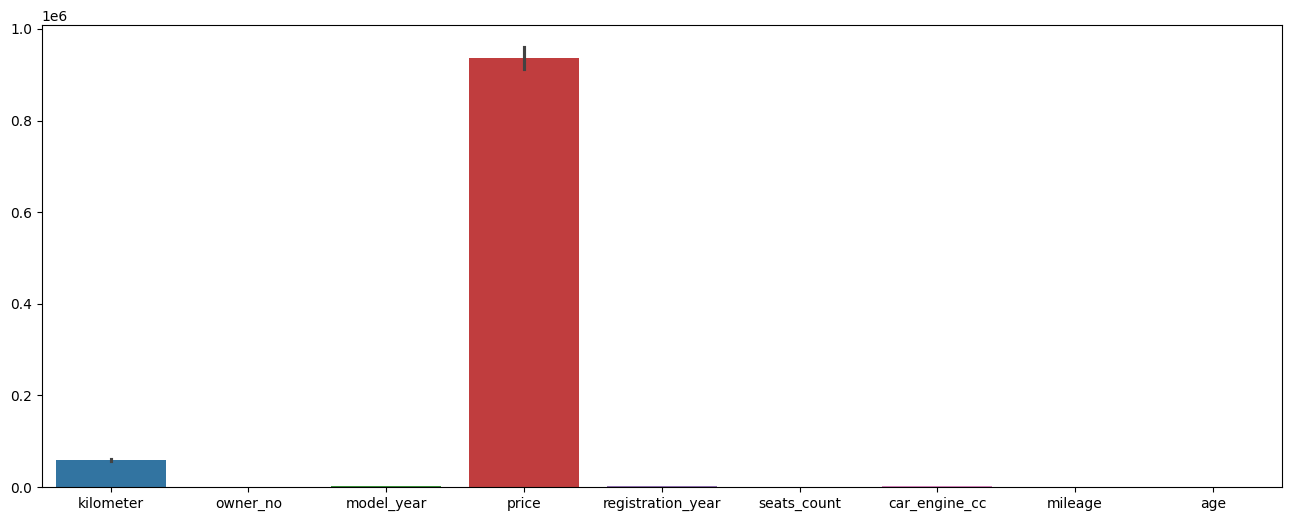

In [11]:
plt.figure(figsize=(16,6))
sns.barplot(data)
plt.show()

kilometer


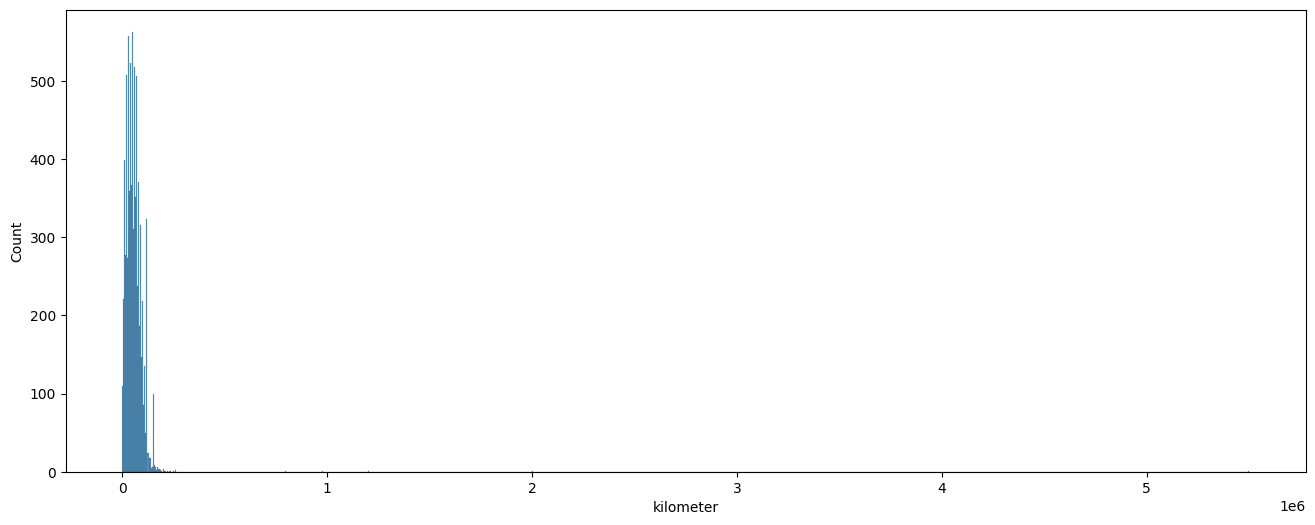

owner_no


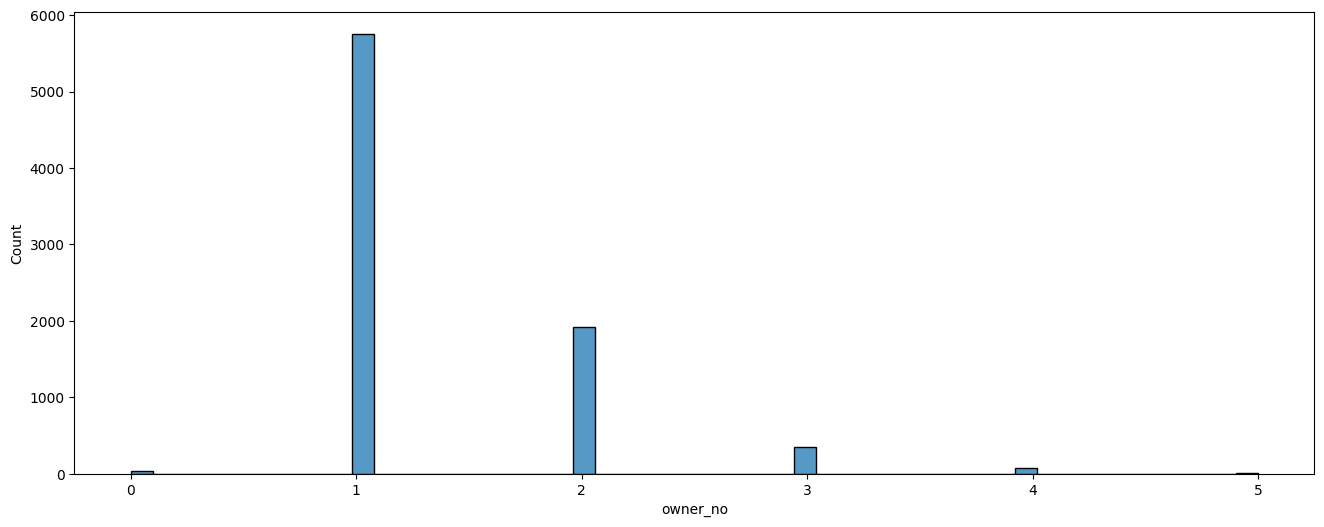

model_year


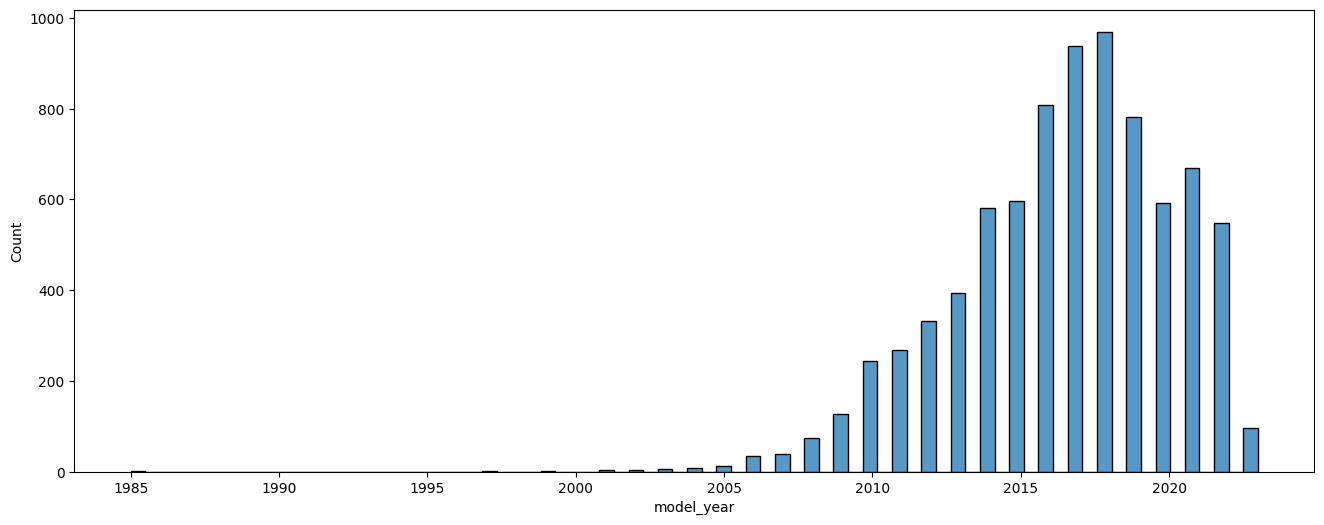

price


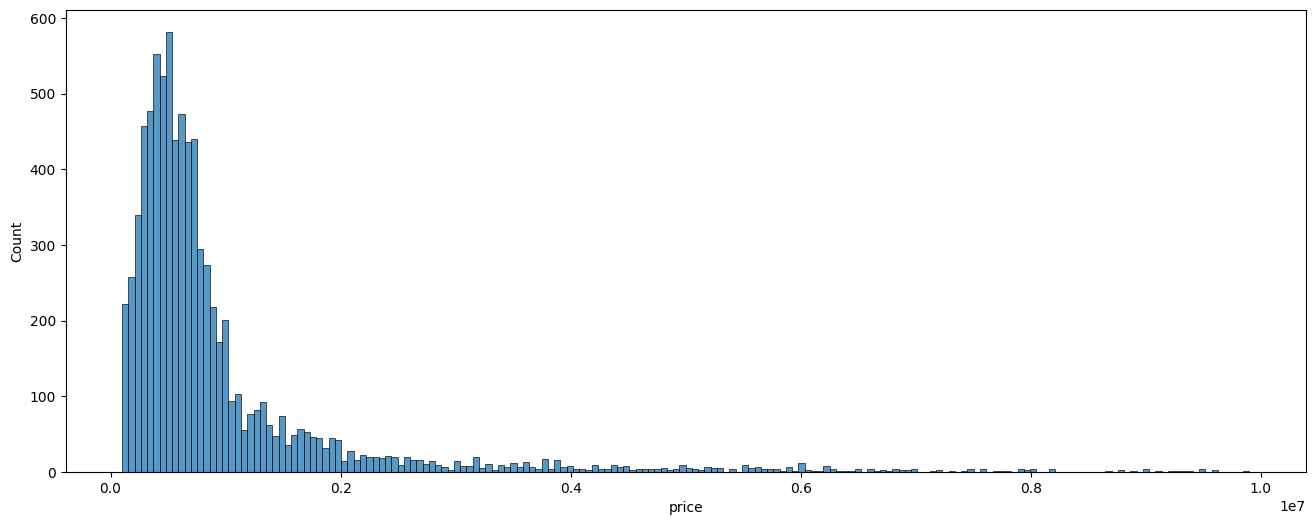

registration_year


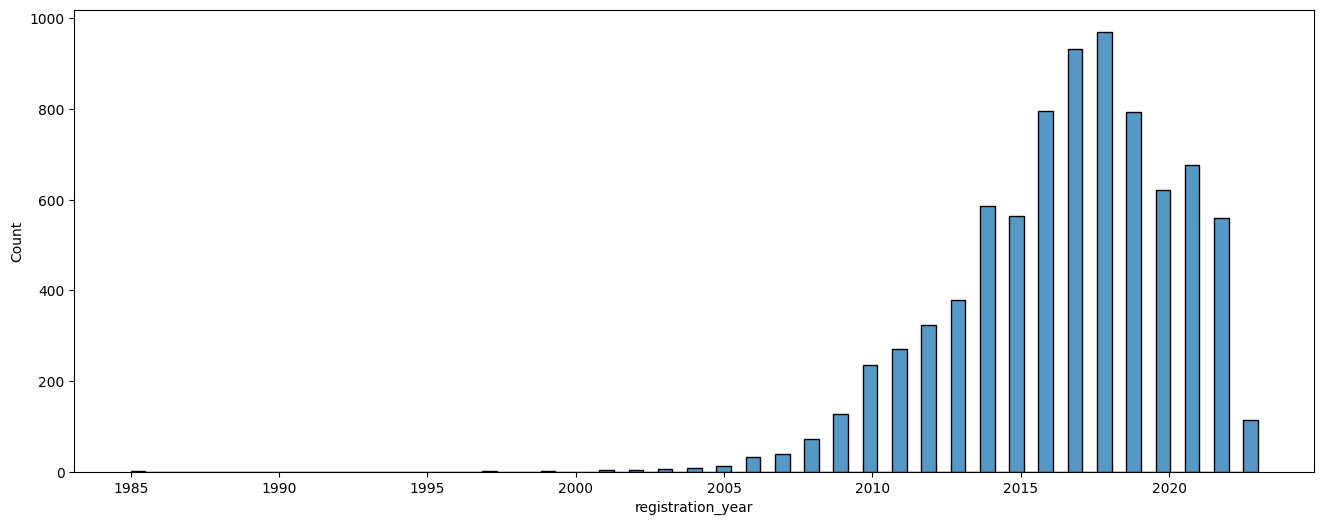

seats_count


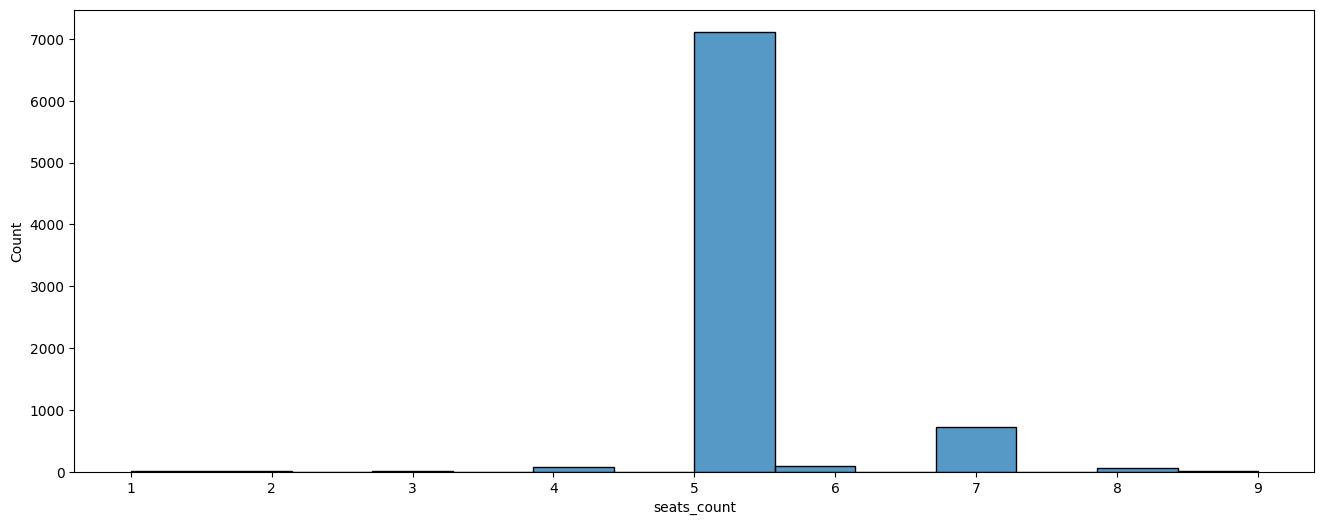

car_engine_cc


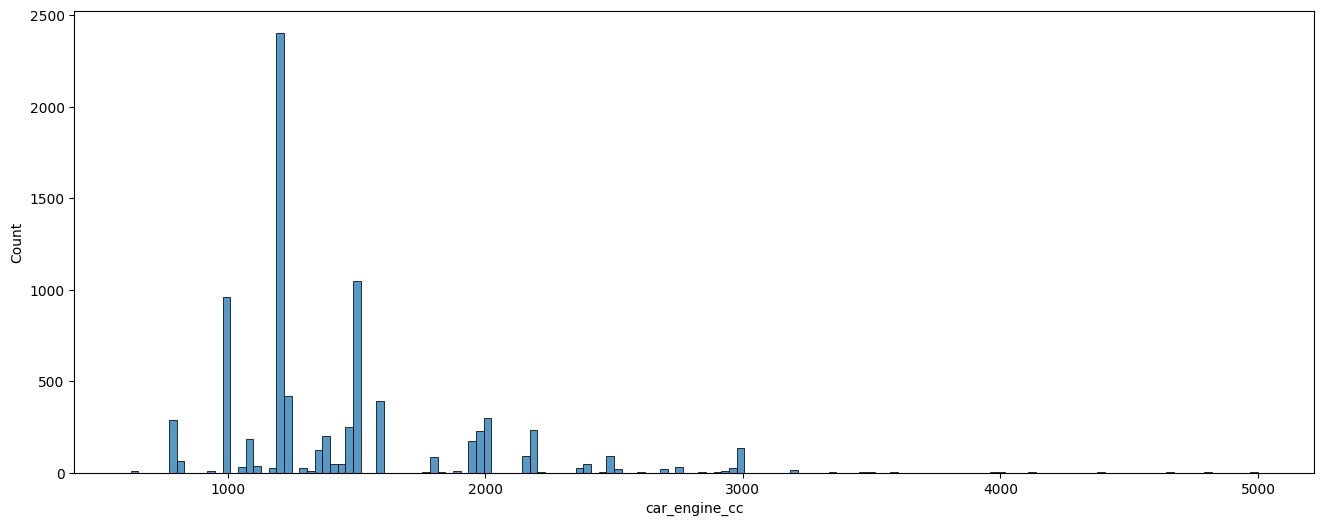

mileage


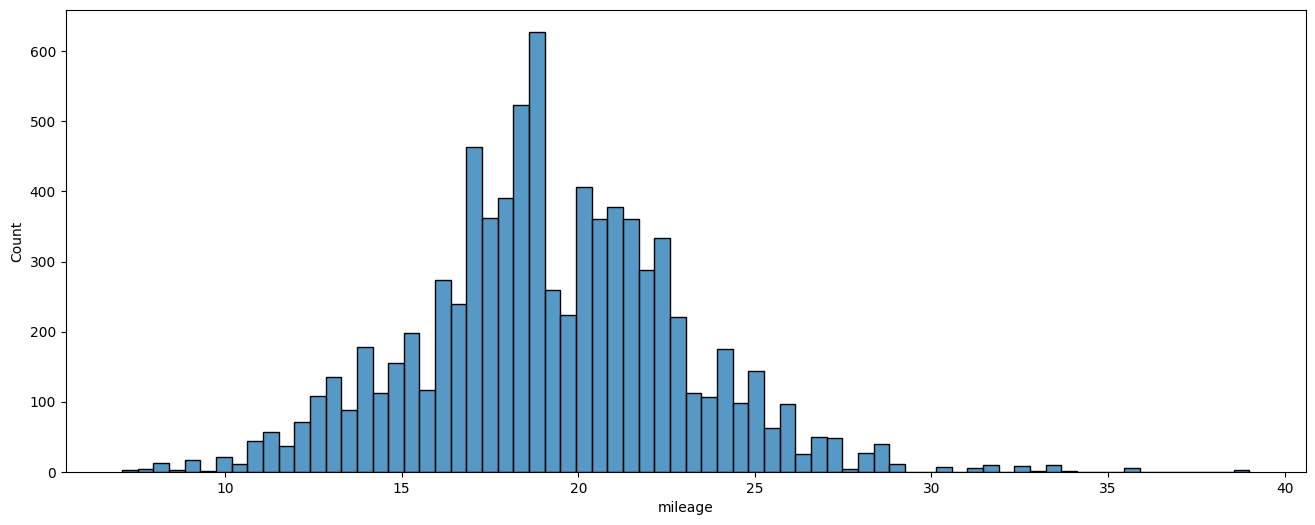

age


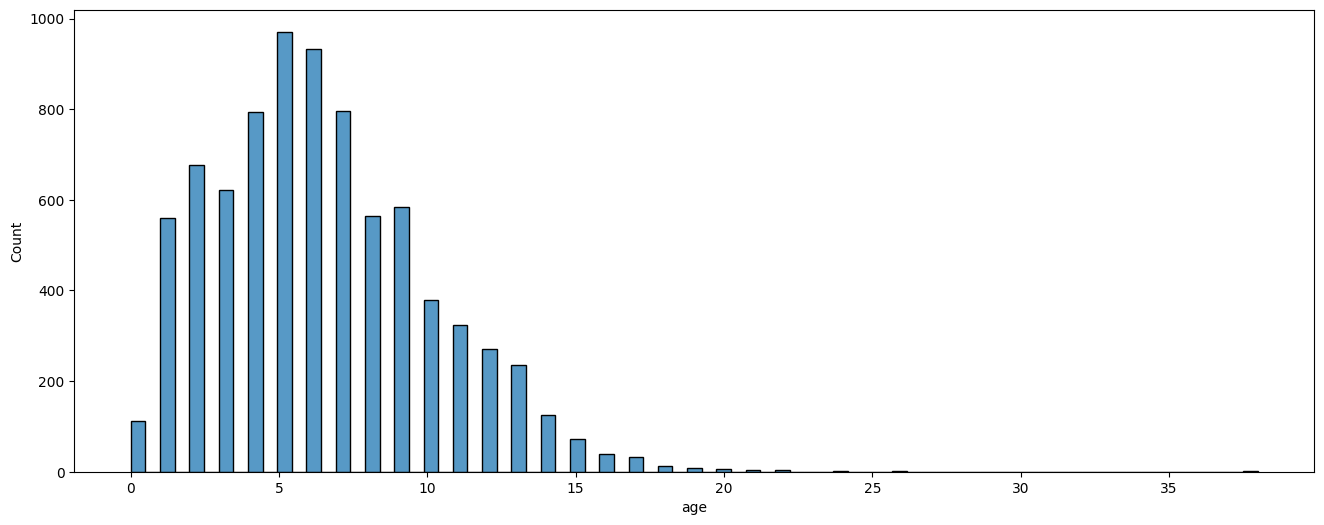

In [12]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.histplot(data=data[i])
        plt.show()

In [13]:
def plot_cat(column_name):
    data_1 = data[column_name].value_counts()
#     print(data_1)
    color = sns.color_palette("husl",len(data_1))
    plt.figure(figsize=(16,5))
    data_1.plot(kind="hist",color=color)
    
    plt.show()

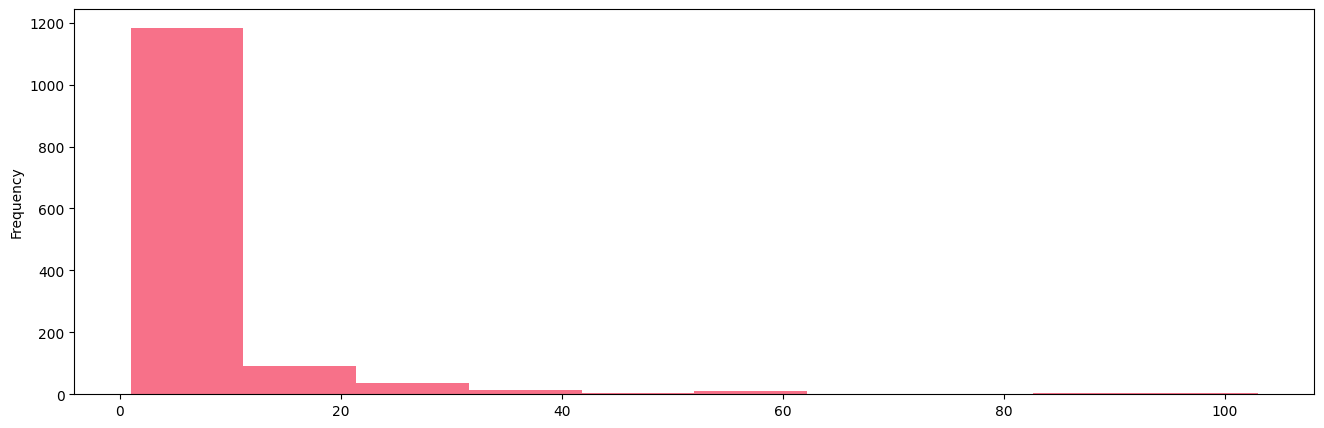

In [14]:
plot_cat('price')

kilometer


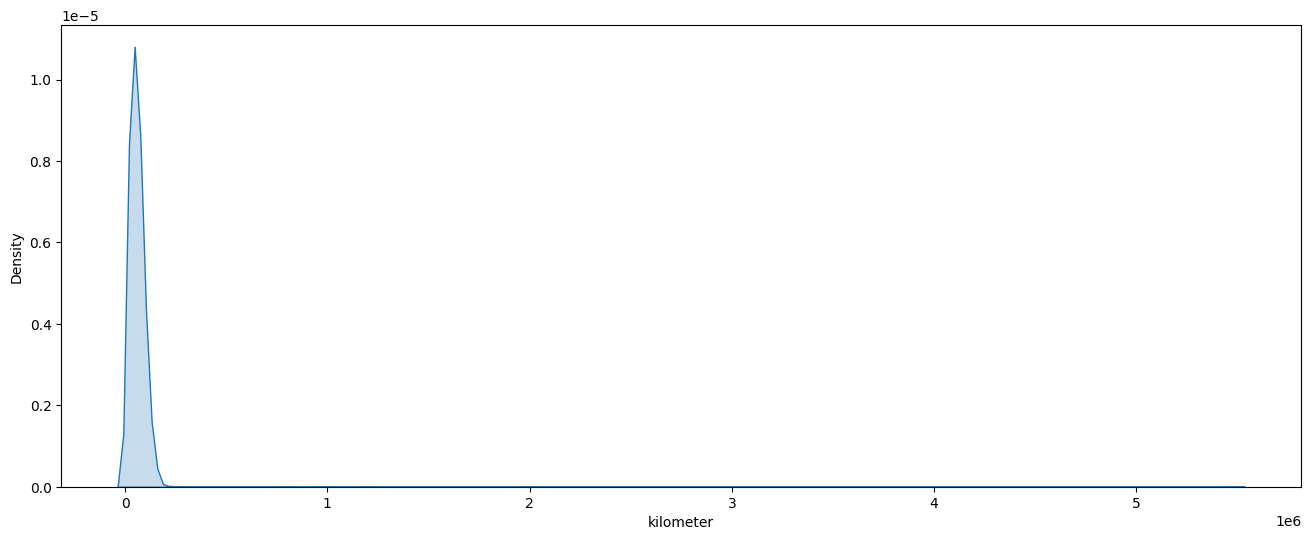

owner_no


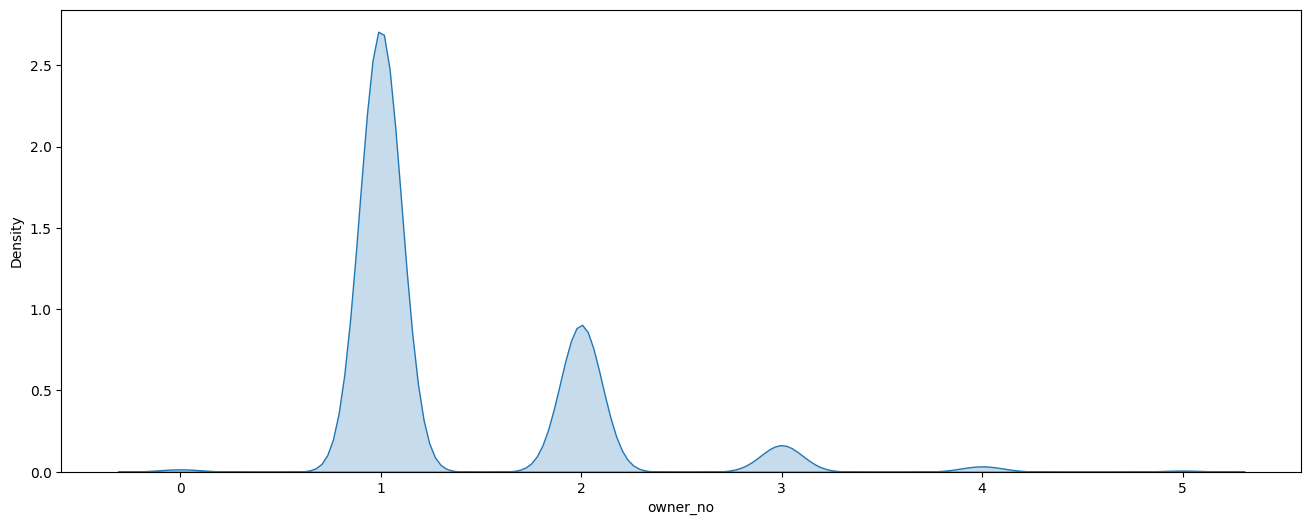

model_year


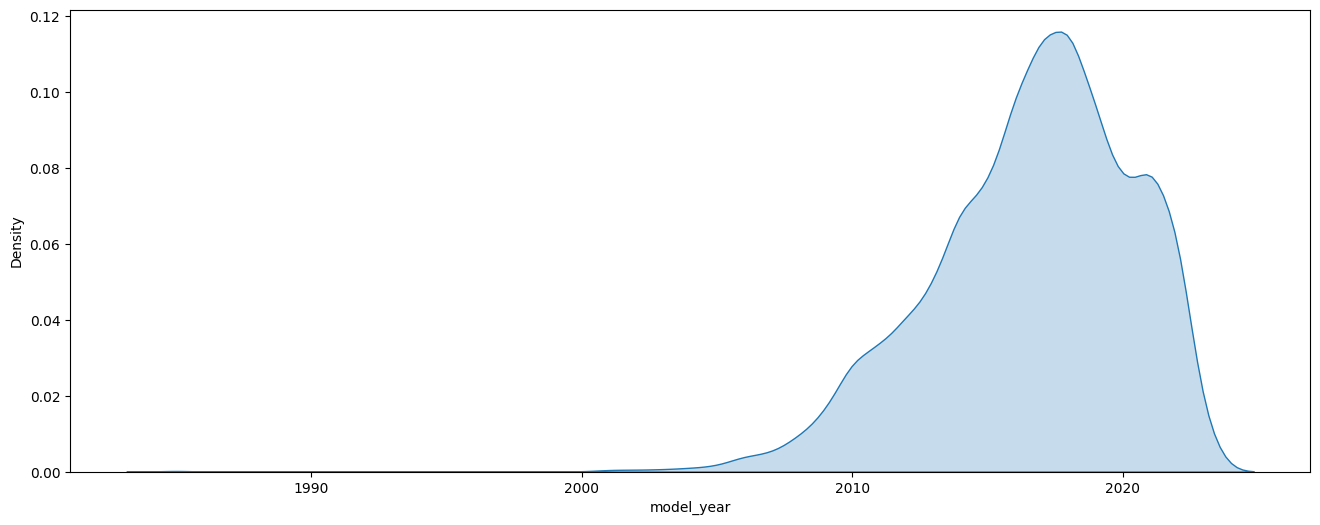

price


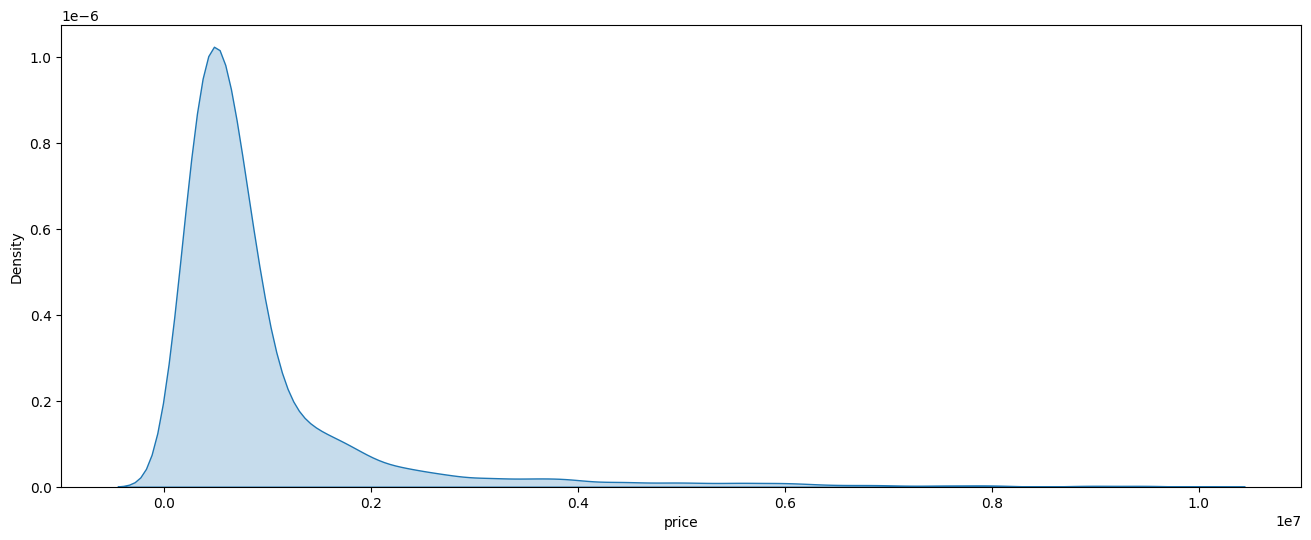

registration_year


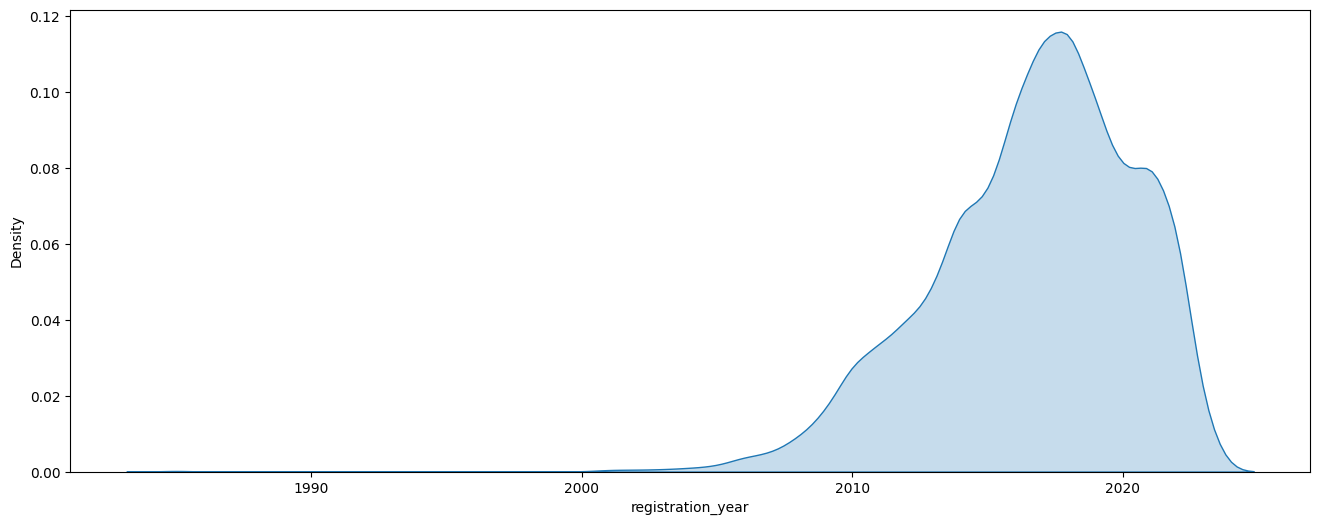

seats_count


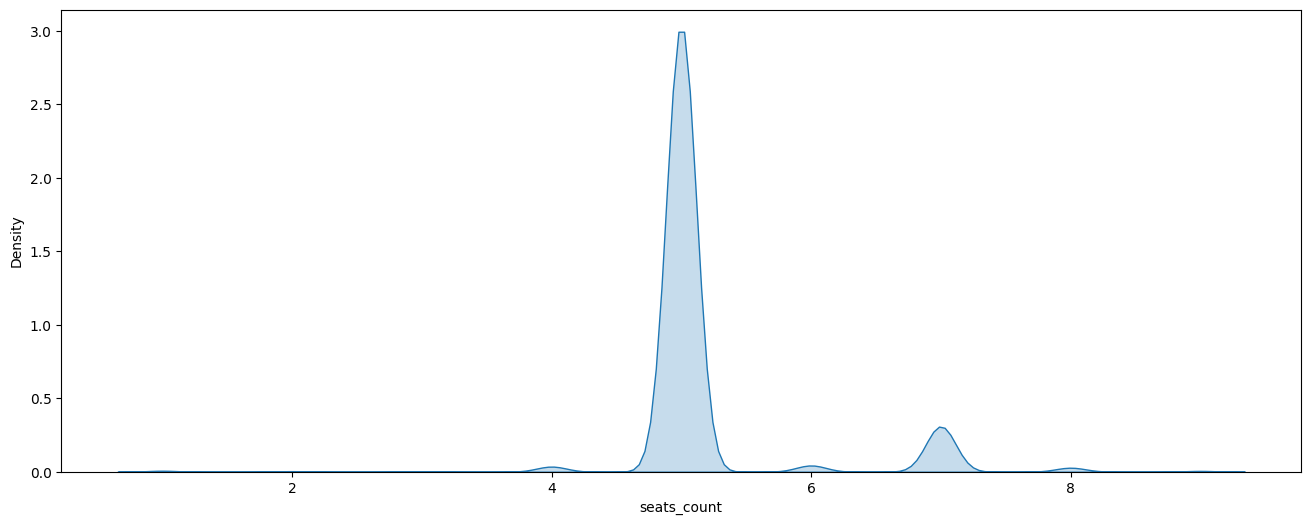

car_engine_cc


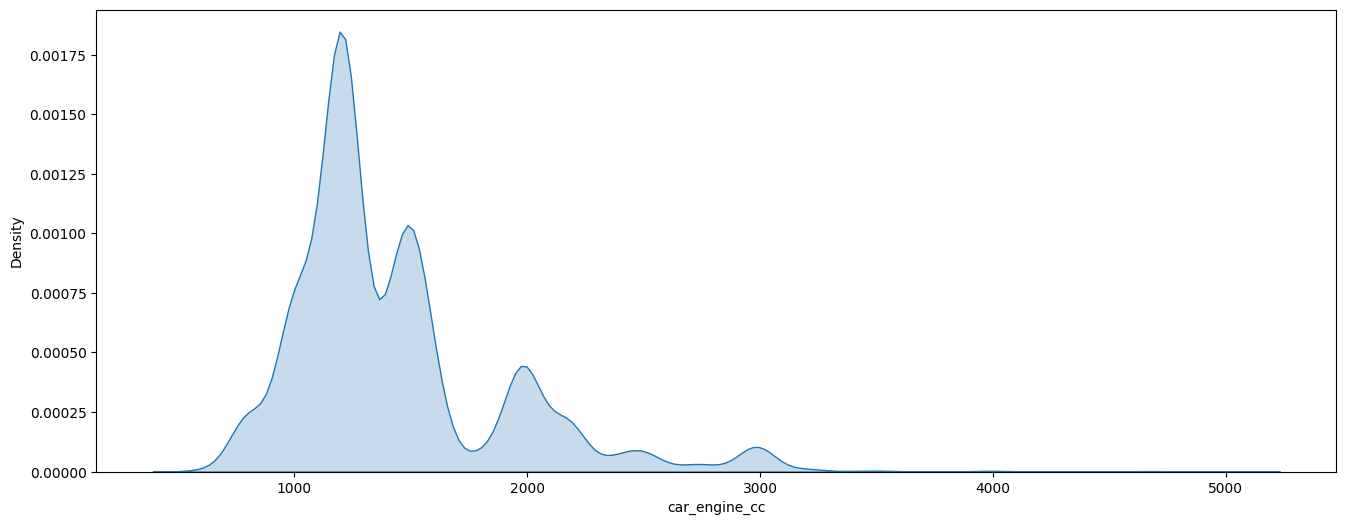

mileage


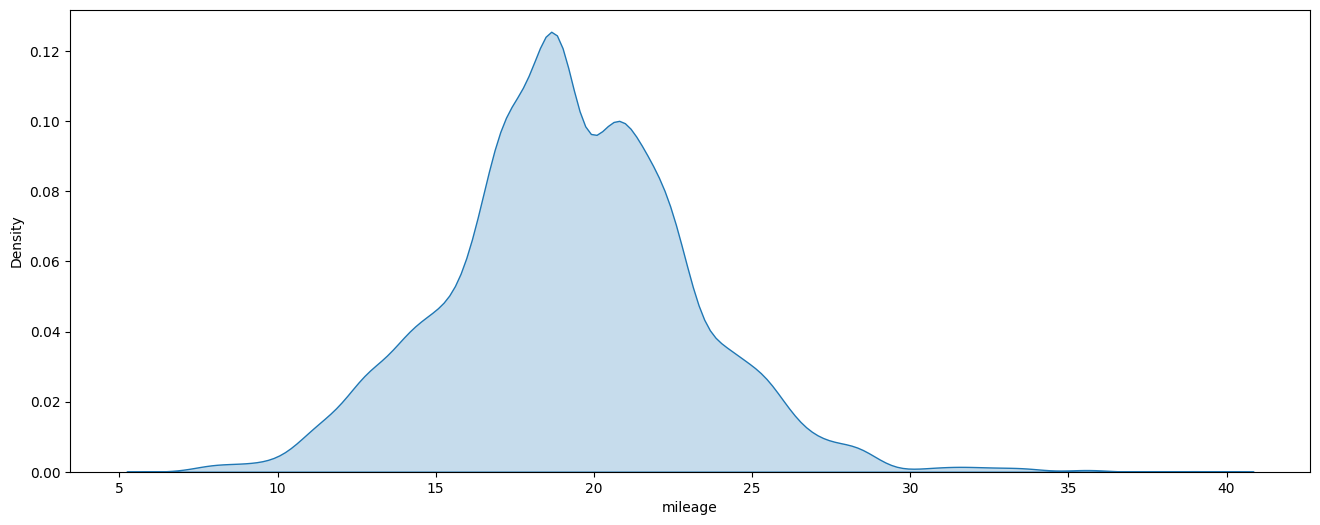

age


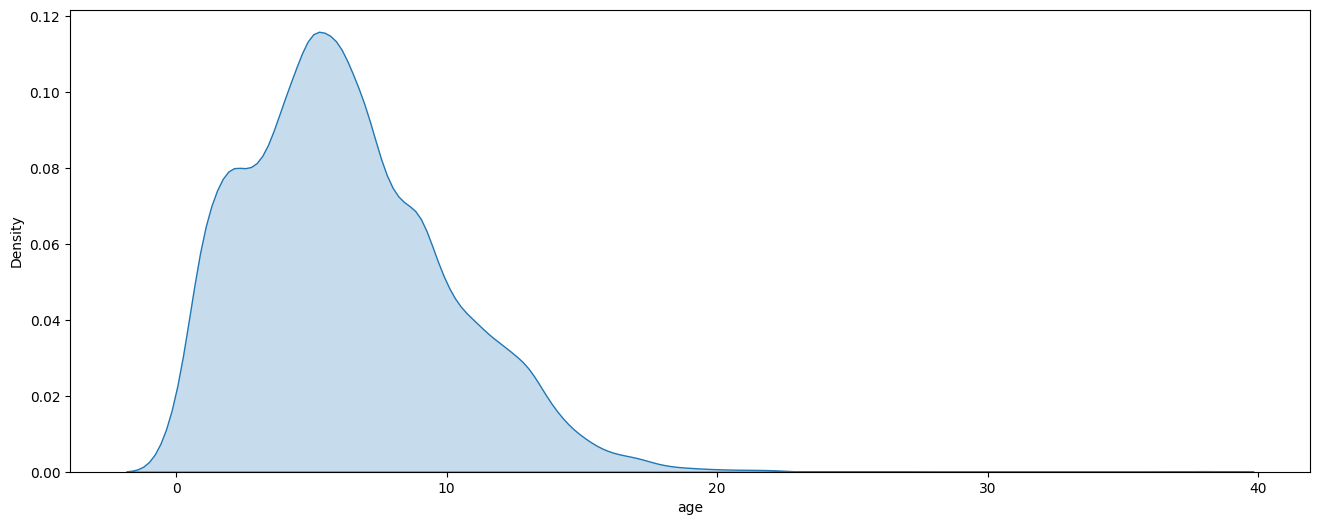

In [15]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.kdeplot(data=data[i],fill=True)
        plt.show()

In [16]:
def inver(x):
    if x!=0:
        return 1/x
    else:
        return 0
    
data['kilometer']=data['kilometer'].apply(inver)

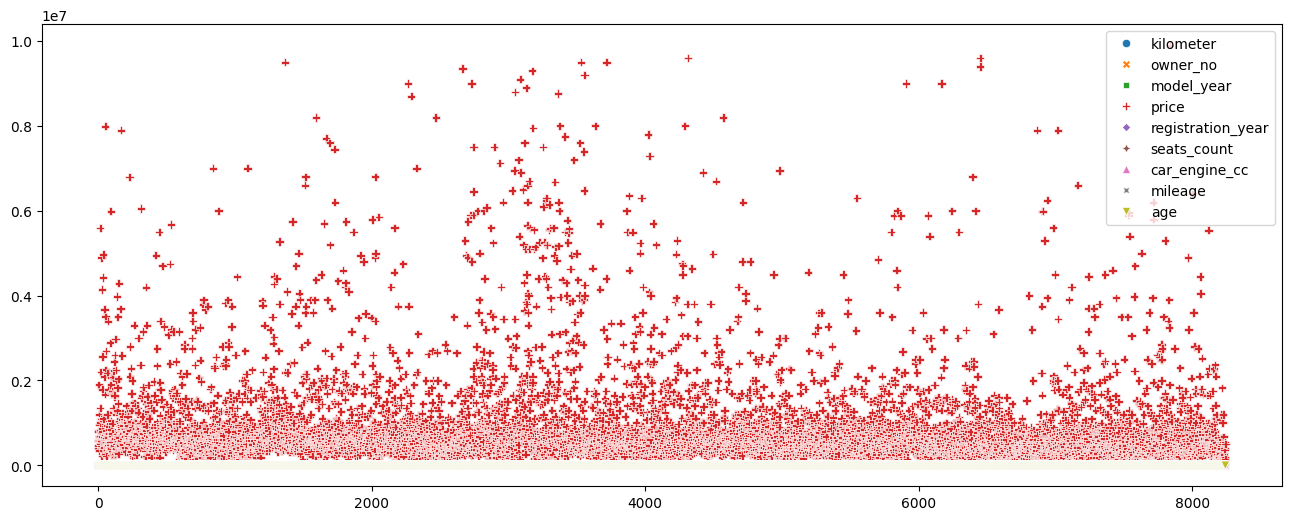

In [17]:
plt.figure(figsize=(16,6))
sns.scatterplot(data)
plt.show()

In [18]:
d=data[(data['price']>1700000)&(data['brand']!='Mercedes-Benz')&(data['brand']!='Mini')&(data['brand']!='Volvo')&(data['brand']!='Porsche')&(data['brand']!='Land Rover')&(data['brand']!='Jeep')&(data['brand']!='BMW')&(data['brand']!='Audi')&(data['brand']!='Toyota')&(data['brand']!='Jaguar')]
d
data.drop(d.index,inplace=True)
# d['brand'].unique()
# # d[d['brand']=="Porsche"]

In [19]:
d=data[data['mileage']>30]

data.drop(d.index,inplace=True)

In [20]:
d=data[data['model_year']<=2001]

data.drop(d.index,inplace=True)

In [21]:
data.to_csv('dont_ordinalencoding_cardekho.csv',index=False)

In [22]:
data.head()

,fuel_type,body_type,kilometer,transmission_type,owner_no,brand,model,model_year,price,registration_year,seats_count,car_engine_cc,mileage,color,location,age
0,Petrol,Hatchback,0.000008,Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.10,White,bangalore,8
1,Petrol,SUV,0.000031,Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17.00,White,bangalore,5
2,Petrol,Hatchback,0.000084,Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84,Red,bangalore,5
3,Petrol,Sedan,0.000056,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.10,Others,bangalore,9
4,Diesel,SUV,0.000017,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65,Gray,bangalore,8


In [23]:
#ORDINAL ENCODING
# it is used to convert categorical data into numerical format when the categories have an inherent order or ranking.
df=pd.read_csv(r"dont_ordinalencoding_cardekho.csv")
df.head()

,fuel_type,body_type,kilometer,transmission_type,owner_no,brand,model,model_year,price,registration_year,seats_count,car_engine_cc,mileage,color,location,age
0,Petrol,Hatchback,0.000008,Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.10,White,bangalore,8
1,Petrol,SUV,0.000031,Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17.00,White,bangalore,5
2,Petrol,Hatchback,0.000084,Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84,Red,bangalore,5
3,Petrol,Sedan,0.000056,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.10,Others,bangalore,9
4,Diesel,SUV,0.000017,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65,Gray,bangalore,8


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel_type          7814 non-null   object 
 1   body_type          7810 non-null   object 
 2   kilometer          7814 non-null   float64
 3   transmission_type  7814 non-null   object 
 4   owner_no           7814 non-null   int64  
 5   brand              7814 non-null   object 
 6   model              7814 non-null   object 
 7   model_year         7814 non-null   int64  
 8   price              7814 non-null   float64
 9   registration_year  7814 non-null   int64  
 10  seats_count        7814 non-null   int64  
 11  car_engine_cc      7814 non-null   int64  
 12  mileage            7814 non-null   float64
 13  color              7814 non-null   object 
 14  location           7814 non-null   object 
 15  age                7814 non-null   int64  
dtypes: float64(3), int64(6),

In [25]:
try:
    from sklearn.preprocessing import OrdinalEncoder
    enc=OrdinalEncoder()
    for i in df.columns:
        if df[i].dtype == 'object':
            col_name = i
            df[i] = enc.fit_transform(df[[i]])
            encoding = df[i].sort_values().unique()
            globals()[i] = {}
            decoded_data = enc.inverse_transform(df[[i]])
            decoded = sorted(np.unique(decoded_data)) 
            globals()[i] = dict(zip(decoded, encoding))
except:
    from sklearn.preprocessing import OrdinalEncoder
    enc=OrdinalEncoder()
    for i in df.columns:
        if df[i].dtype == 'object':
            col_name = i
            df[i] = enc.fit_transform(df[[i]])
            encoding = df[i].sort_values().unique()
            globals()[i] = {}
            decoded_data = enc.inverse_transform(df[[i]])
            decoded = sorted(np.unique(decoded_data)) 
            globals()[i] = dict(zip(decoded, encoding))

In [26]:
location

{'bangalore': 0.0,
 'chennai': 1.0,
 'delhi': 2.0,
 'hyderabad': 3.0,
 'jaipur': 4.0,
 'kolkata': 5.0}

In [27]:
fuel_type

{'Cng': 0.0, 'Diesel': 1.0, 'Lpg': 2.0, 'Petrol': 3.0}

In [28]:
df.head()

,fuel_type,body_type,kilometer,transmission_type,owner_no,brand,model,model_year,price,registration_year,seats_count,car_engine_cc,mileage,color,location,age
0,3.0,2.0,0.000008,1.0,3,19.0,142.0,2015,400000.0,2015,5,998,23.10,128.0,0.0,8
1,3.0,7.0,0.000031,1.0,2,6.0,48.0,2018,811000.0,2018,5,1497,17.00,128.0,0.0,5
2,3.0,2.0,0.000084,1.0,1,27.0,245.0,2018,585000.0,2018,5,1199,23.84,101.0,0.0,5
3,3.0,8.0,0.000056,1.0,1,9.0,82.0,2014,462000.0,2014,5,1197,19.10,78.0,0.0,9
4,1.0,7.0,0.000017,1.0,1,19.0,160.0,2015,790000.0,2015,5,1248,23.65,50.0,0.0,8


In [29]:
df.columns

Index(['fuel_type', 'body_type', 'kilometer', 'transmission_type', 'owner_no',
       'brand', 'model', 'model_year', 'price', 'registration_year',
       'seats_count', 'car_engine_cc', 'mileage', 'color', 'location', 'age'],
      dtype='object')

In [30]:
continuous=df[['body_type','kilometer','brand', 'model', 'model_year', 'price', 'registration_year', 'age']]
categorical=df[['fuel_type','transmission_type','owner_no','seats_count','car_engine_cc', 'mileage','location']]

In [31]:
df.to_csv('ml_cardekho.csv',index=False)

<Axes: >

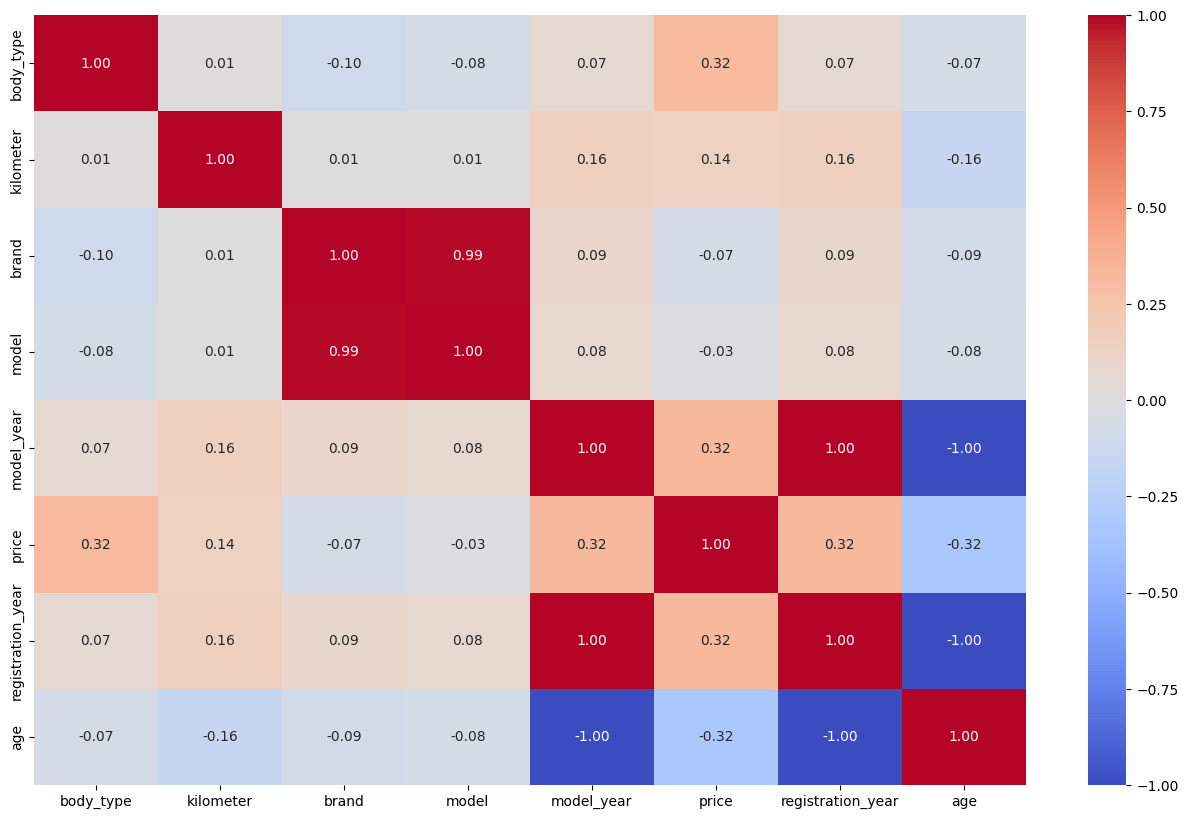

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".2f")

In [33]:
df=pd.read_csv(r"ml_cardekho.csv")
df.head()

,fuel_type,body_type,kilometer,transmission_type,owner_no,brand,model,model_year,price,registration_year,seats_count,car_engine_cc,mileage,color,location,age
0,3.0,2.0,0.000008,1.0,3,19.0,142.0,2015,400000.0,2015,5,998,23.10,128.0,0.0,8
1,3.0,7.0,0.000031,1.0,2,6.0,48.0,2018,811000.0,2018,5,1497,17.00,128.0,0.0,5
2,3.0,2.0,0.000084,1.0,1,27.0,245.0,2018,585000.0,2018,5,1199,23.84,101.0,0.0,5
3,3.0,8.0,0.000056,1.0,1,9.0,82.0,2014,462000.0,2014,5,1197,19.10,78.0,0.0,9
4,1.0,7.0,0.000017,1.0,1,19.0,160.0,2015,790000.0,2015,5,1248,23.65,50.0,0.0,8


In [34]:
df.drop(columns=['registration_year','body_type','brand','color'],inplace=True)

In [35]:
continuous_1=df[['kilometer', 'model', 'model_year', 'price']]
categorical_1=df[['fuel_type','transmission_type','owner_no','seats_count','car_engine_cc', 'mileage','location']]

# HYPOTHESIS TESTING

In [36]:
# checking hypothesis testing (anova test) to continuous column to continuous column
import scipy.stats as stats

for i in continuous_1:
    for j in continuous_1:
        f_statistic, p_value = stats.f_oneway(df[i],df[j])
        if p_value > 0.05:
            print(i,j,p_value)

kilometer kilometer 1.0
model_year model_year 1.0
price price 1.0


In [37]:
# checking hypothesis testing (chi_square test) to categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical_1:
    for j in categorical_1:
        contingency_table = pd.crosstab(data[i], data[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
#         if p_value > 0.05:
        print(i,j,p_value)

fuel_type fuel_type 0.0
fuel_type transmission_type 4.239318258077139e-15
fuel_type owner_no 3.5201990144133664e-10
fuel_type seats_count 1.3499968594755945e-139
fuel_type car_engine_cc 0.0
fuel_type mileage 0.0
fuel_type location 1.4210916297413412e-27
transmission_type fuel_type 4.239318258077139e-15
transmission_type transmission_type 0.0
transmission_type owner_no 0.14096704628806286
transmission_type seats_count 1.5970346539940492e-12
transmission_type car_engine_cc 0.0
transmission_type mileage 0.0
transmission_type location 1.3766648824621476e-29
owner_no fuel_type 3.5201990144133664e-10
owner_no transmission_type 0.14096704628806273
owner_no owner_no 0.0
owner_no seats_count 0.0
owner_no car_engine_cc 2.9681096786682444e-99
owner_no mileage 5.456706224516396e-59
owner_no location 1.0440145895520773e-52
seats_count fuel_type 1.3499968594755943e-139
seats_count transmission_type 1.5970346539940307e-12
seats_count owner_no 0.0
seats_count seats_count 0.0
seats_count car_engine_cc 

# FEATURE IMPORTANCE

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
x=df.drop(columns=['price'])
y=df['price']

In [40]:
model = RandomForestRegressor(n_estimators=20,random_state=40)

In [41]:
model.fit(x,y)

RandomForestRegressor(n_estimators=20, random_state=40)

In [42]:
model.feature_importances_

array([0.00230865, 0.04948469, 0.10874992, 0.00501738, 0.05033555,
       0.1247581 , 0.01308761, 0.49347349, 0.0523204 , 0.0133905 ,
       0.08707371])

In [43]:
pd.DataFrame({
    "column": x.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)

,column,Score
7,car_engine_cc,49.347349
5,model_year,12.475810
2,transmission_type,10.874992
10,age,8.707371
8,mileage,5.232040
4,model,5.033555
1,kilometer,4.948469
9,location,1.339050
6,seats_count,1.308761
3,owner_no,0.501738


# TRAIN AND SPLIT

In [44]:
X=df.drop(['price'],axis=1)
Y=df['price']

In [45]:
X.columns

Index(['fuel_type', 'kilometer', 'transmission_type', 'owner_no', 'model',
       'model_year', 'seats_count', 'car_engine_cc', 'mileage', 'location',
       'age'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6251, 11), (1563, 11), (6251,), (1563,))

# RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000,random_state=21,max_depth=40,min_samples_split=2)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=1000, random_state=21)

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

y_pred_test = model.predict(x_test)
# y_pred_train = model.predict(x_train)

# print(mean_absolute_error(y_pred_train, y_train))
print(mean_absolute_error(y_pred_test, y_test))

141826.09479252354


In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.8600625393546872

In [50]:
import pickle
with open('random_regression.pkl','wb') as file:
    pickle.dump(model,file)

In [51]:
with open('random_regression.pkl','rb') as file:
    Result = pickle.load(file)

In [52]:
y_pred=Result.predict(x_test)

In [53]:
mean_absolute_error(y_pred,y_test)

141826.09479252354

In [54]:
X.head()

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,5,1248,23.65,0.0,8


In [55]:
datas=np.array([[3.0,0.000031,1.0,2,48.0,2018,2,1497,17.00,0.0,2]])

In [56]:
y_pred=Result.predict(datas)
y_pred

c:\Users\bhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([864979.])

In [57]:
y.head()

0    400000.0
1    811000.0
2    585000.0
3    462000.0
4    790000.0
Name: price, dtype: float64

In [58]:
df.shape

(7814, 12)

fuel_type


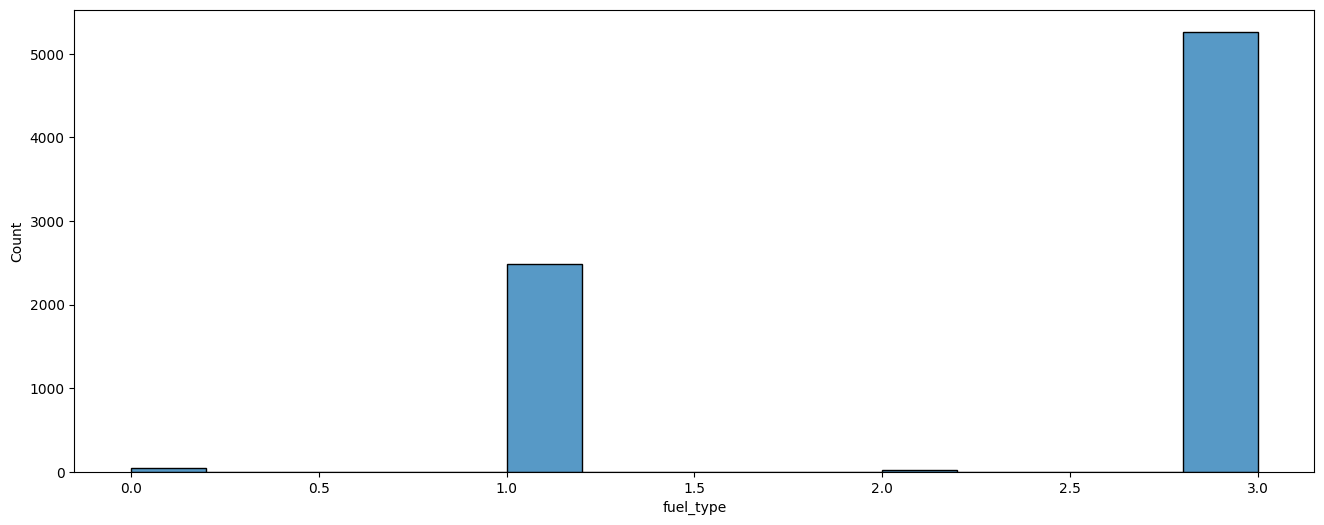

kilometer


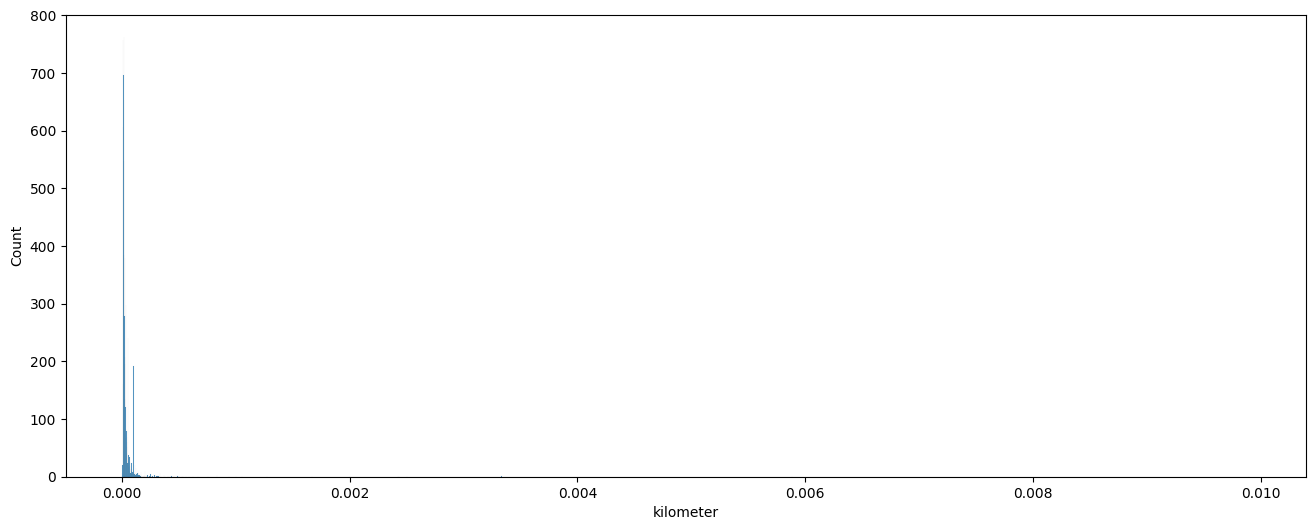

transmission_type


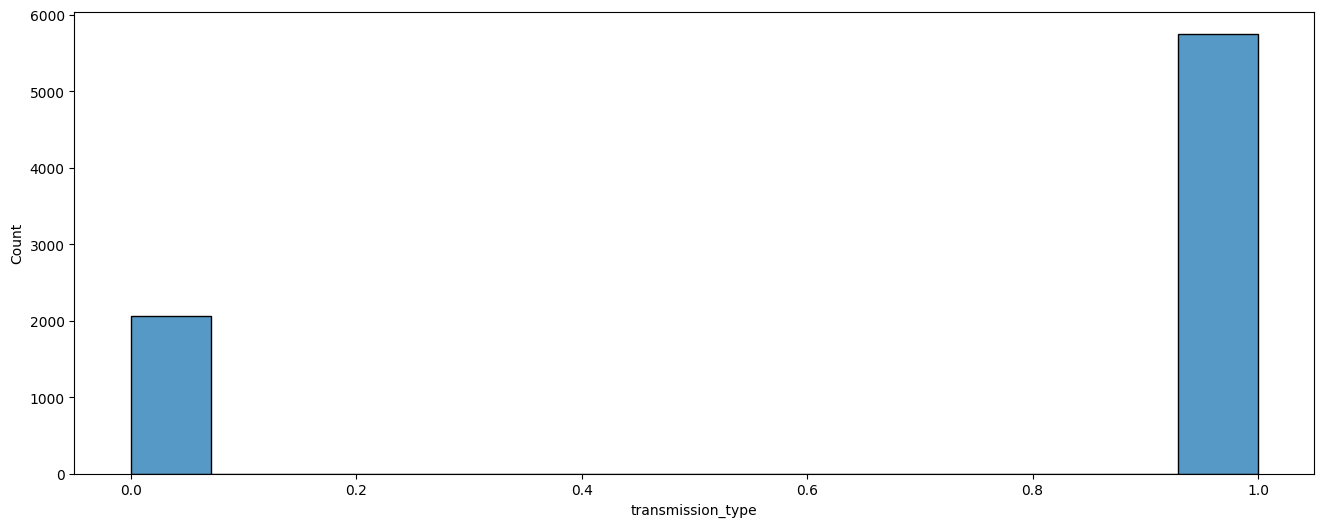

owner_no


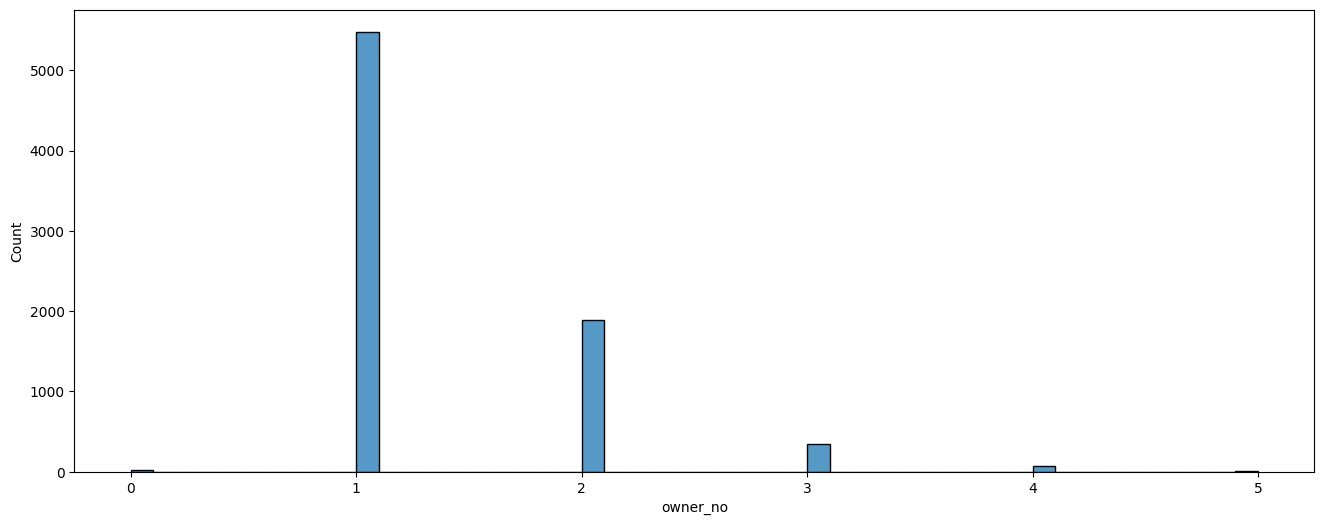

model


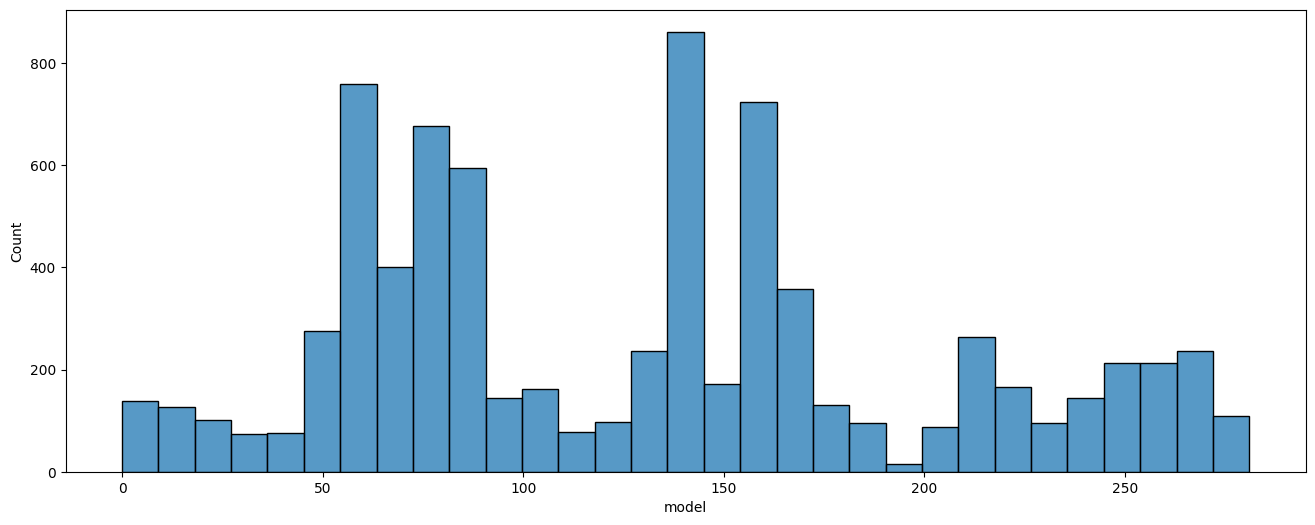

model_year


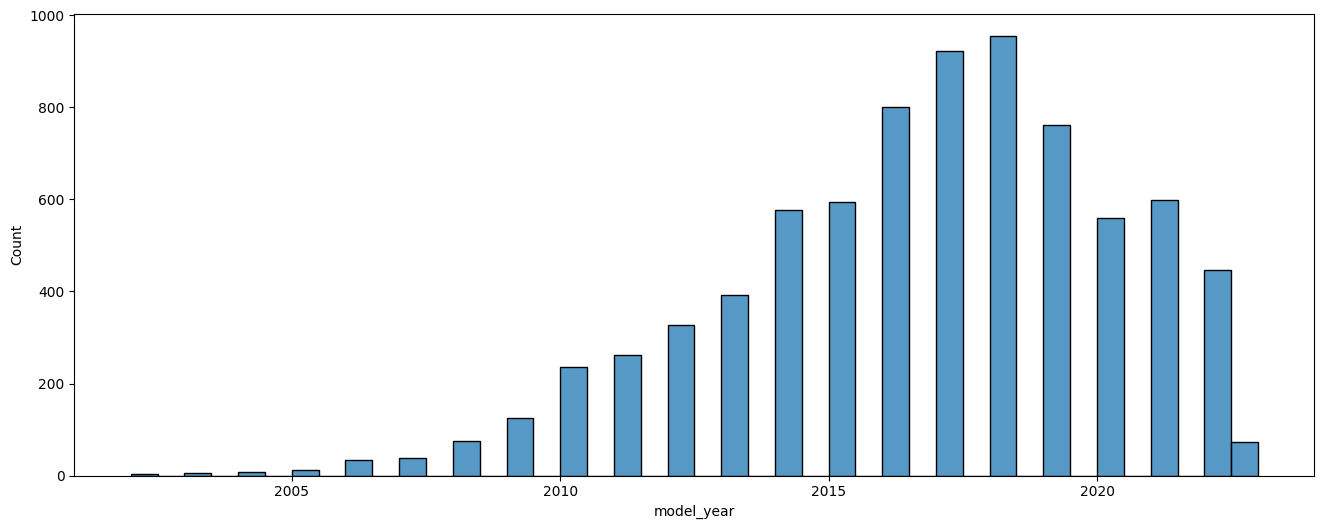

price


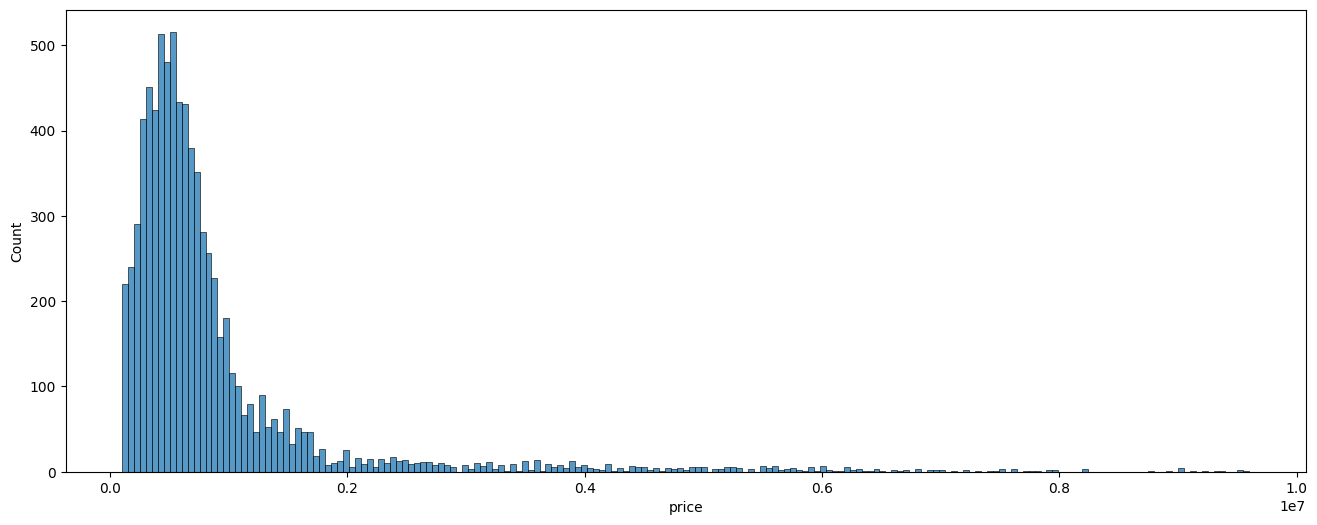

seats_count


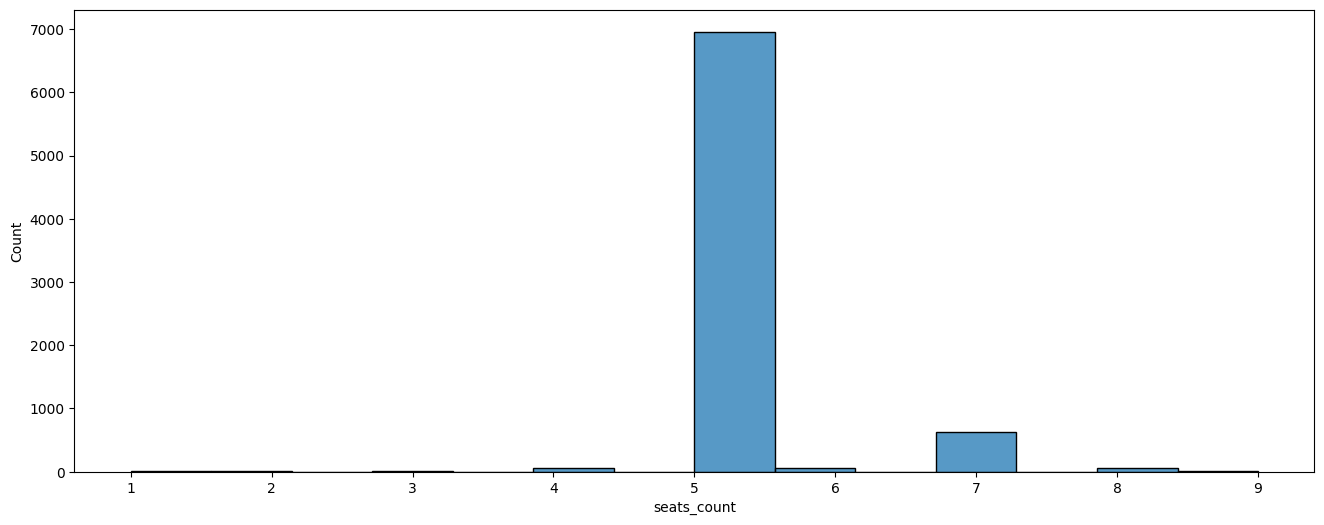

car_engine_cc


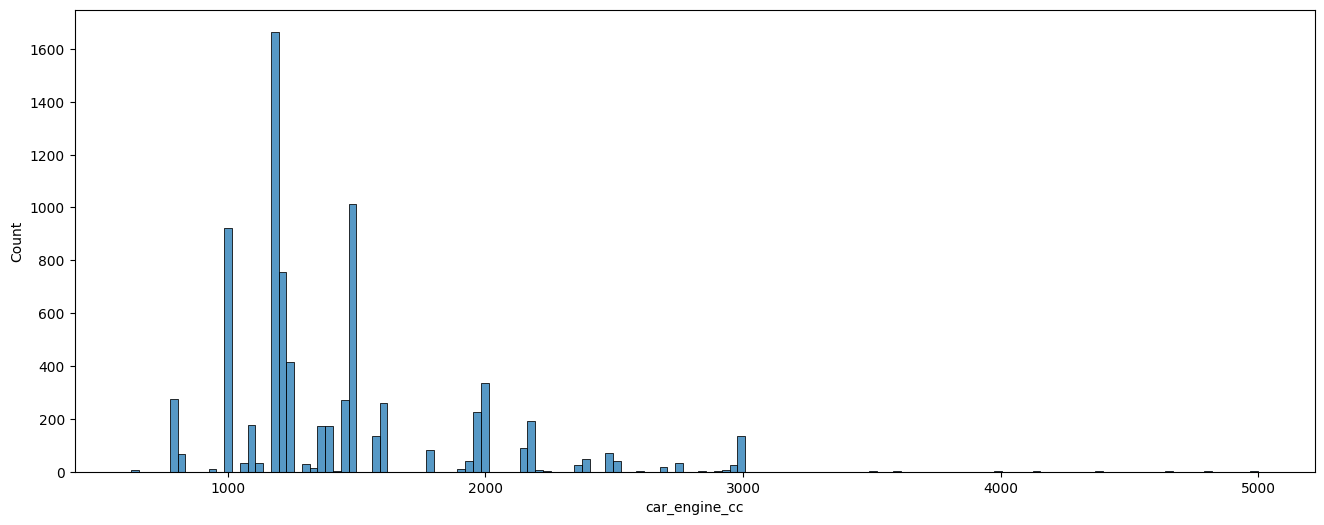

mileage


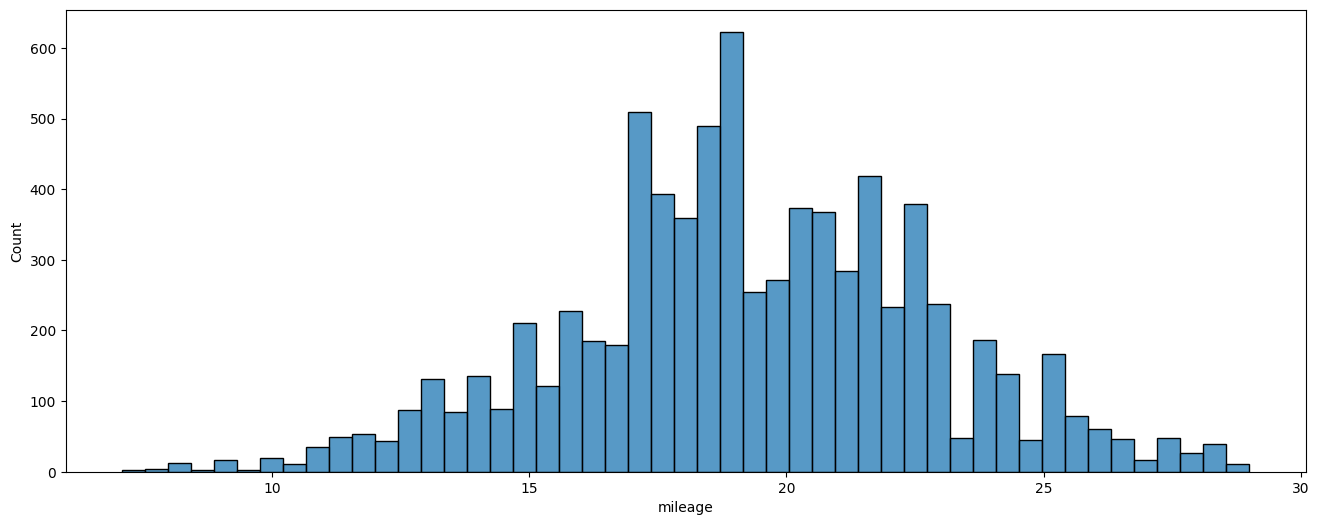

location


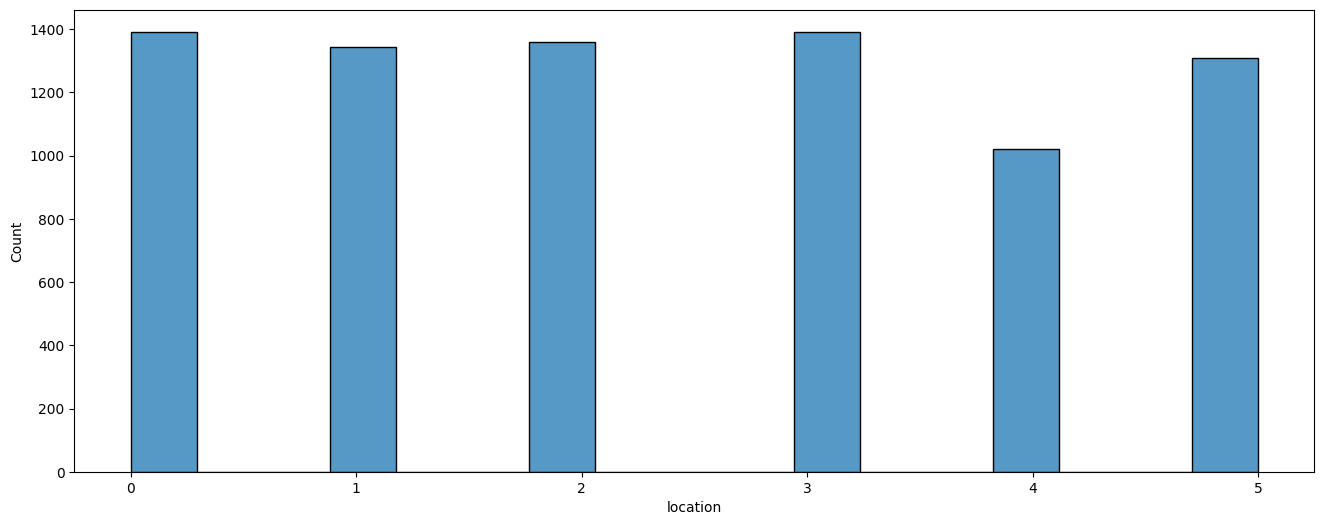

age


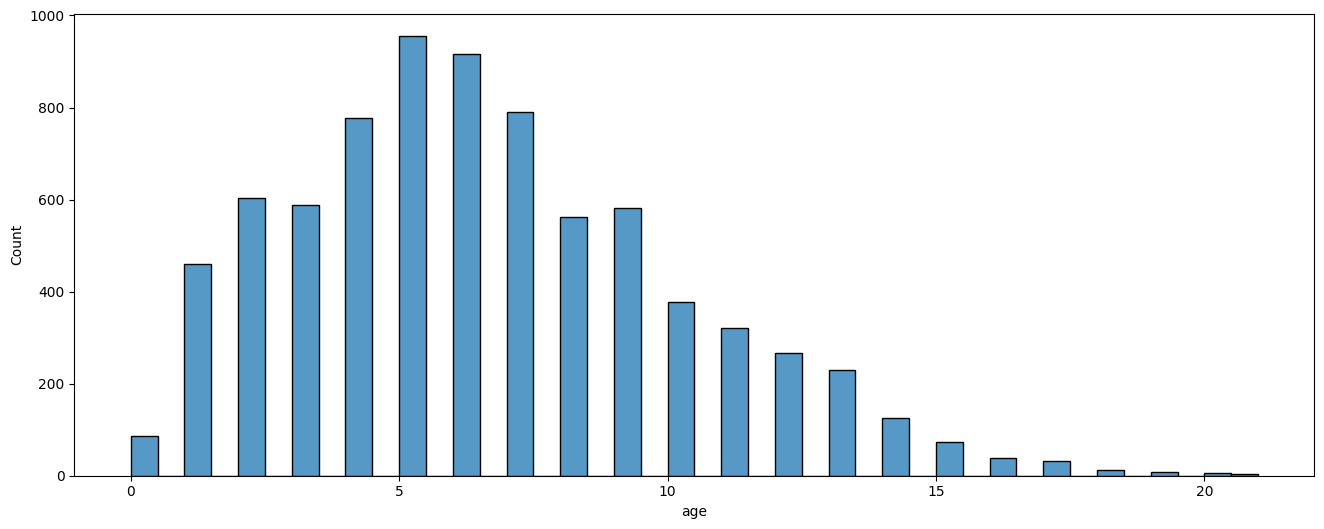

In [59]:
for i in df.columns:
    if df[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.histplot(data=df[i])
        plt.show()

In [60]:
d=df[df['model_year']<=2001]
d
df.drop(d.index,inplace=True)

In [61]:
df

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,price,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,400000.0,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,811000.0,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,585000.0,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,462000.0,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,790000.0,5,1248,23.65,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,3.0,0.000100,1.0,1,142.0,2022,510000.0,5,998,25.24,5.0,1
7810,3.0,0.000008,1.0,1,137.0,2014,180000.0,5,796,22.74,5.0,9
7811,3.0,0.000020,0.0,3,177.0,2011,550000.0,5,1796,11.74,5.0,12
7812,3.0,0.000025,1.0,1,157.0,2012,140000.0,5,1197,18.50,5.0,11


In [62]:
d=df[df['owner_no']==5]
d
df.drop(d.index,inplace=True)

In [63]:
df

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,price,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,400000.0,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,811000.0,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,585000.0,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,462000.0,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,790000.0,5,1248,23.65,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,3.0,0.000100,1.0,1,142.0,2022,510000.0,5,998,25.24,5.0,1
7810,3.0,0.000008,1.0,1,137.0,2014,180000.0,5,796,22.74,5.0,9
7811,3.0,0.000020,0.0,3,177.0,2011,550000.0,5,1796,11.74,5.0,12
7812,3.0,0.000025,1.0,1,157.0,2012,140000.0,5,1197,18.50,5.0,11


In [64]:
d=df[df['car_engine_cc']>3000]
d
df.drop(d.index,inplace=True)
df

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,price,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,400000.0,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,811000.0,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,585000.0,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,462000.0,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,790000.0,5,1248,23.65,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,3.0,0.000100,1.0,1,142.0,2022,510000.0,5,998,25.24,5.0,1
7810,3.0,0.000008,1.0,1,137.0,2014,180000.0,5,796,22.74,5.0,9
7811,3.0,0.000020,0.0,3,177.0,2011,550000.0,5,1796,11.74,5.0,12
7812,3.0,0.000025,1.0,1,157.0,2012,140000.0,5,1197,18.50,5.0,11


In [65]:
d=df[df['car_engine_cc']<700]
d
df.drop(d.index,inplace=True)
df

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,price,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,400000.0,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,811000.0,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,585000.0,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,462000.0,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,790000.0,5,1248,23.65,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,3.0,0.000100,1.0,1,142.0,2022,510000.0,5,998,25.24,5.0,1
7810,3.0,0.000008,1.0,1,137.0,2014,180000.0,5,796,22.74,5.0,9
7811,3.0,0.000020,0.0,3,177.0,2011,550000.0,5,1796,11.74,5.0,12
7812,3.0,0.000025,1.0,1,157.0,2012,140000.0,5,1197,18.50,5.0,11


In [66]:
d=df[df['mileage']>30]
d
df.drop(d.index,inplace=True)
df

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,price,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,400000.0,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,811000.0,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,585000.0,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,462000.0,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,790000.0,5,1248,23.65,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,3.0,0.000100,1.0,1,142.0,2022,510000.0,5,998,25.24,5.0,1
7810,3.0,0.000008,1.0,1,137.0,2014,180000.0,5,796,22.74,5.0,9
7811,3.0,0.000020,0.0,3,177.0,2011,550000.0,5,1796,11.74,5.0,12
7812,3.0,0.000025,1.0,1,157.0,2012,140000.0,5,1197,18.50,5.0,11


In [67]:
d=df[df['mileage']<10]
d
df.drop(d.index,inplace=True)
df

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,price,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,400000.0,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,811000.0,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,585000.0,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,462000.0,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,790000.0,5,1248,23.65,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,3.0,0.000100,1.0,1,142.0,2022,510000.0,5,998,25.24,5.0,1
7810,3.0,0.000008,1.0,1,137.0,2014,180000.0,5,796,22.74,5.0,9
7811,3.0,0.000020,0.0,3,177.0,2011,550000.0,5,1796,11.74,5.0,12
7812,3.0,0.000025,1.0,1,157.0,2012,140000.0,5,1197,18.50,5.0,11


In [68]:
d=df[df['price']>1700000]
d
df.drop(d.index,inplace=True)
df

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,price,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,400000.0,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,811000.0,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,585000.0,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,462000.0,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,790000.0,5,1248,23.65,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,3.0,0.000100,1.0,1,142.0,2022,510000.0,5,998,25.24,5.0,1
7810,3.0,0.000008,1.0,1,137.0,2014,180000.0,5,796,22.74,5.0,9
7811,3.0,0.000020,0.0,3,177.0,2011,550000.0,5,1796,11.74,5.0,12
7812,3.0,0.000025,1.0,1,157.0,2012,140000.0,5,1197,18.50,5.0,11


In [69]:
d=df[df['kilometer']>250000]
d
df.drop(d.index,inplace=True)
df

,fuel_type,kilometer,transmission_type,owner_no,model,model_year,price,seats_count,car_engine_cc,mileage,location,age
0,3.0,0.000008,1.0,3,142.0,2015,400000.0,5,998,23.10,0.0,8
1,3.0,0.000031,1.0,2,48.0,2018,811000.0,5,1497,17.00,0.0,5
2,3.0,0.000084,1.0,1,245.0,2018,585000.0,5,1199,23.84,0.0,5
3,3.0,0.000056,1.0,1,82.0,2014,462000.0,5,1197,19.10,0.0,9
4,1.0,0.000017,1.0,1,160.0,2015,790000.0,5,1248,23.65,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,3.0,0.000100,1.0,1,142.0,2022,510000.0,5,998,25.24,5.0,1
7810,3.0,0.000008,1.0,1,137.0,2014,180000.0,5,796,22.74,5.0,9
7811,3.0,0.000020,0.0,3,177.0,2011,550000.0,5,1796,11.74,5.0,12
7812,3.0,0.000025,1.0,1,157.0,2012,140000.0,5,1197,18.50,5.0,11


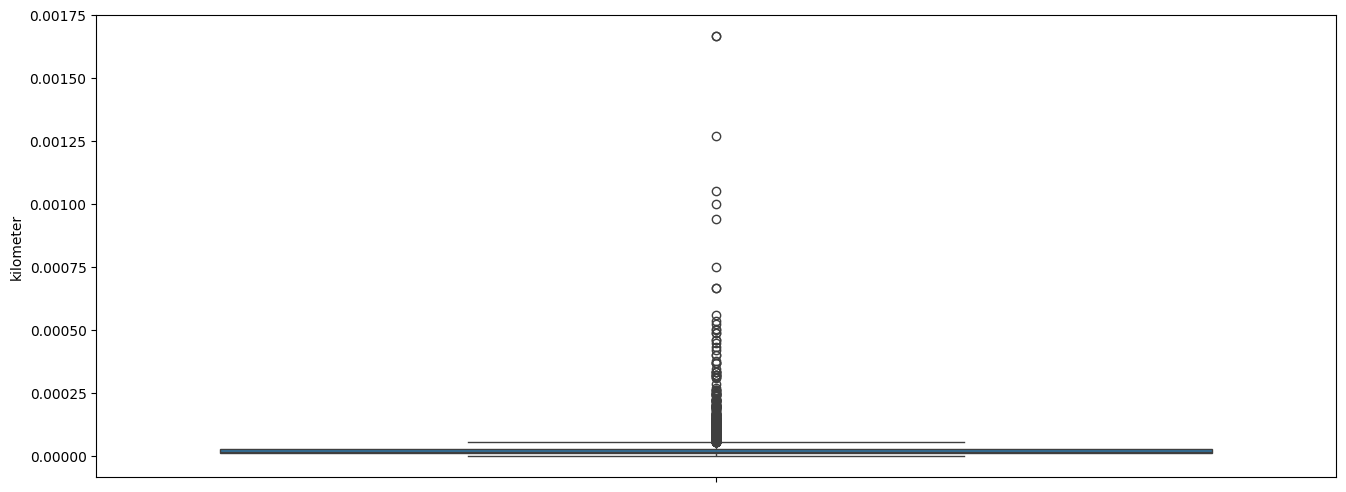

In [70]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df['kilometer'])
plt.show()

In [71]:
X.columns

Index(['fuel_type', 'kilometer', 'transmission_type', 'owner_no', 'model',
       'model_year', 'seats_count', 'car_engine_cc', 'mileage', 'location',
       'age'],
      dtype='object')